Import libs and data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

df = pd.read_excel("Superstore.xls")

In [9]:
df.iloc[1]
len(df.values)

9994

In [10]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

Graph the data we have to deal with

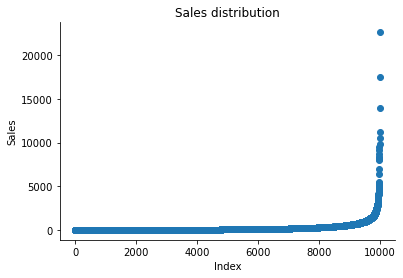

In [11]:
# df.shape[0]
plt.scatter(range(df.shape[0]), np.sort(df['Sales'].values))
plt.xlabel("Index")
plt.ylabel("Sales")
plt.title("Sales distribution")
sns.despine()

Train the model on "Sales"

In [12]:
isolation_forest=IsolationForest(n_estimators=100)
isolation_forest.fit(df['Sales'].values.reshape(-1,1))
x_axis=np.linspace(df['Sales'].min(), df['Sales'].max(), len(df['Sales'])).reshape(-1,1)

Predict the anomalies and graph them

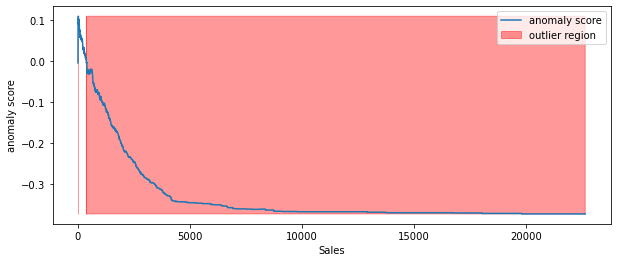

In [13]:
anomaly_score = isolation_forest.decision_function(x_axis)
outliers = isolation_forest.predict(x_axis)

plt.figure(figsize=(10,4))
plt.plot(x_axis, anomaly_score, label='anomaly score')
plt.fill_between(x_axis.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outliers==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show()

Graph the data on its own

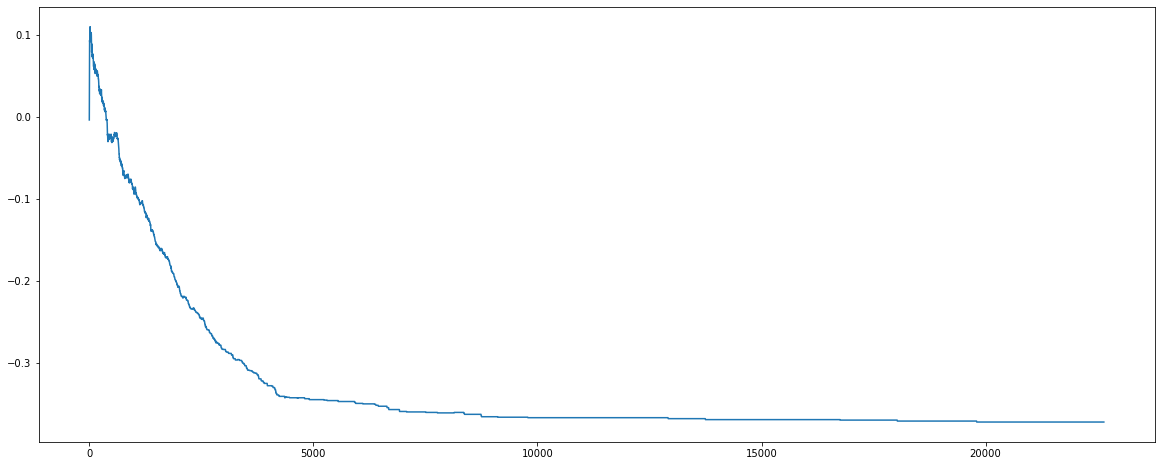

In [14]:
linear=np.linspace(1,99)
plt.figure(figsize=(20,8))
plt.plot(x_axis.T[0], anomaly_score)

In [15]:
isolation_forest.predict(pd.DataFrame([10]))

array([1])

Let's train on the "Profit" factor

In [16]:
isolation_forest = IsolationForest()
isolation_forest.fit(df['Profit'].values.reshape(-1,1))
x_axis=np.linspace(df['Profit'].min(), df['Profit'].max(), len(df['Profit'])).reshape(-1,1)

Predict and graph

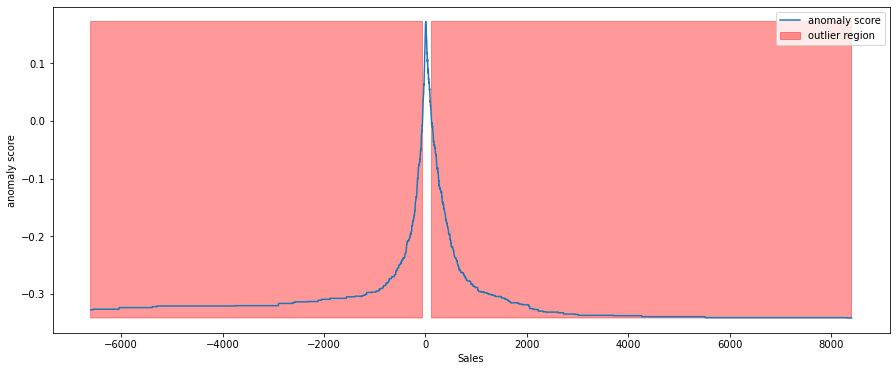

In [20]:
anomaly_score = isolation_forest.decision_function(x_axis)
outliers = isolation_forest.predict(x_axis)

plt.figure(figsize=(15,6))
plt.plot(x_axis, anomaly_score, label='anomaly score')
plt.fill_between(x_axis.reshape(1,-1)[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outliers==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show()